## Important Imports

In [1]:
from pynq import Overlay , allocate
import numpy as np
import matplotlib.pyplot as plt

BITSTREAM = '/home/xilinx/jupyter_notebooks/YOLO_PYNQ/yolo_pynq.bit'
overlay=Overlay(BITSTREAM)

## Displaying the system blocks

In [2]:
overlay?

## Creating a DMA Instance

In [3]:
dma = overlay.axi_dma_0
dma_send = dma.sendchannel

## Allocating Space in the memory for the image

In [4]:
data_size = 416*416
input_buffer = allocate(shape=(data_size,), dtype=np.uint32)

## Storing the image in the allocated Buffer

In [5]:
with open('/home/xilinx/jupyter_notebooks/YOLO_PYNQ/pixels_hex.txt', 'r') as f:
    lines = f.readlines()

for i in range(data_size):
    rgb24 = int(lines[i].strip() , 16)  # Get 24-bit RGB value
    # Pack into 32-bit word (upper 8 bits unused)
    input_buffer[i] = rgb24 | 0x00000000  # Explicitly show unused bits
    

## Creating GPIOs Instances

In [6]:
det_valid = overlay.det_valid
row_det0=overlay.row_det0
row_det1=overlay.row_det1
row_det2=overlay.row_det2
row_det3=overlay.row_det3
row_det4=overlay.row_det4
row_det5=overlay.row_det5
row_det6=overlay.row_det6
row_det7=overlay.row_det7
row_det8=overlay.row_det8
row_det9=overlay.row_det9
row_det10=overlay.row_det10
row_det11=overlay.row_det11
row_det12=overlay.row_det12


##  Code for displaying the image and the outputs

Successfully loaded 173056 pixels
First pixel value (hex): 0x004A523D
Last pixel value (hex): 0x001C211B


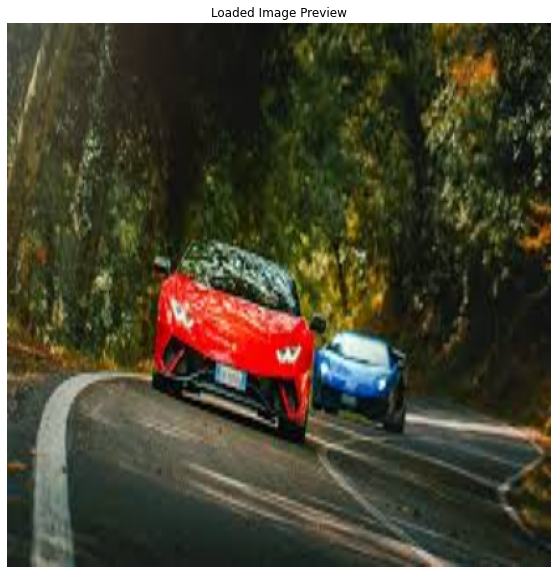

In [7]:
import numpy as np
import matplotlib.pyplot as plt
width = 416
height = 416

image_array = np.zeros((height, width, 3), dtype=np.uint8)  # For display

for i in range(data_size):
    try:
        # Convert hex string to 24-bit RGB
        rgb24 = int(lines[i], 16)
        
        # Store in DMA buffer (32-bit word)
        input_buffer[i] = rgb24
        
        # Also unpack for image display
        y, x = divmod(i, width)
        image_array[y, x] = [
            (rgb24 >> 16) & 0xFF,  # R
            (rgb24 >> 8) & 0xFF,    # G
            rgb24 & 0xFF            # B
        ]
        
    except ValueError:
        raise ValueError(f"Invalid hex at line {i+1}: {lines[i]}")

# 3. Display results
print(f"Successfully loaded {data_size} pixels")
print(f"First pixel value (hex): 0x{input_buffer[0]:08X}")
print(f"Last pixel value (hex): 0x{input_buffer[-1]:08X}")

# Show the image
plt.figure(figsize=(10, 10))
plt.imshow(image_array)
plt.title("Loaded Image Preview")
plt.axis('off')
plt.show()


Det_valid:0 
 Row_det0:0000000000000 
 Row_det1:0000000000000
 Row_det2:0000000000000
 Row_det3:0000000000000
 Row_det4:0000000000000
 Row_det5:0000000000000
 Row_det6:0000000000000
 Row_det7:0000000000000
 Row_det8:0000000011000
 Row_det9:0000000010000
 Row_det10:0000000000000
 Row_det11:0000000000000
 Row_det12:0000000000000


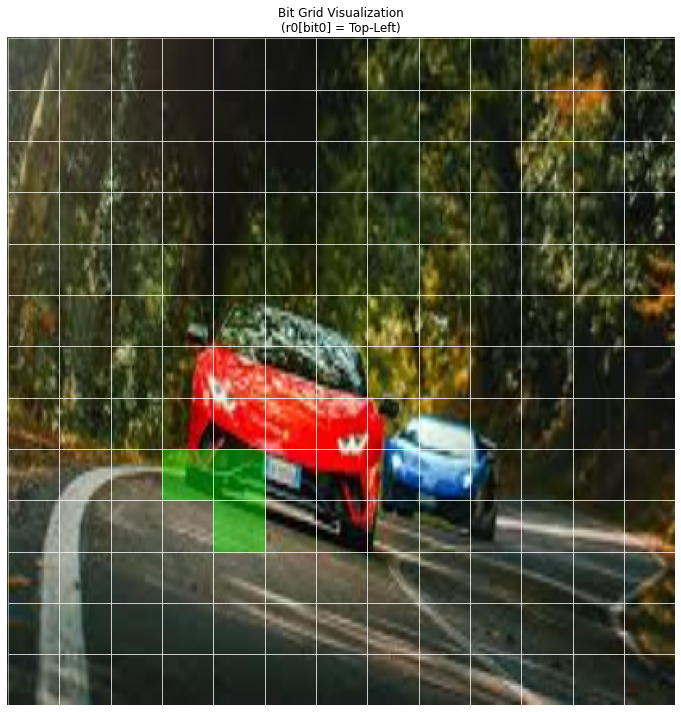

In [9]:
from pynq.lib import AxiGPIO
dma_send.transfer(input_buffer)
det_valid.setdirection('in')
row_det0.setdirection('in')
row_det1.setdirection('in')
row_det2.setdirection('in')
row_det3.setdirection('in')
row_det4.setdirection('in')
row_det5.setdirection('in')
row_det6.setdirection('in')
row_det7.setdirection('in')
row_det8.setdirection('in')
row_det9.setdirection('in')
row_det10.setdirection('in')
row_det11.setdirection('in')
row_det12.setdirection('in')
dtv=det_valid.read()
r0=row_det0.read()
r1=row_det1.read()
r2=row_det2.read()
r3=row_det3.read()
r4=row_det4.read()
r5=row_det5.read()
r6=row_det6.read()
r7=row_det7.read()
r8=row_det8.read()
r9=row_det9.read()
r10=row_det10.read()
r11=row_det11.read()
r12=row_det12.read()
print(f"Det_valid:{dtv:01b} \n Row_det0:{r0:013b} \n Row_det1:{r1:013b}\n Row_det2:{r2:013b}\n Row_det3:{r3:013b}\n Row_det4:{r4:013b}\n Row_det5:{r5:013b}\n Row_det6:{r6:013b}\n Row_det7:{r7:013b}\n Row_det8:{r8:013b}\n Row_det9:{r9:013b}\n Row_det10:{r10:013b}\n Row_det11:{r11:013b}\n Row_det12:{r12:013b}")
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle

def visualize_bit_grid(image_array, r0, r1, r2, r3, r4, r5, r6, r7, r8, r9, r10, r11, r12):
    """
    Visualize 13-bit variables on a 416x416 image with:
    - r0[bit 0] at top-left (row 0, column 0)
    - r0[bit 1] at (row 0, column 1)
    - ...
    - r1[bit 0] at (row 1, column 0)
    """
    fig, ax = plt.subplots(figsize=(10, 10))
    ax.imshow(image_array)
    
    # Grid parameters
    rows, cols = 13, 13
    cell_size = 416 // 13
    
    # Process each row variable
    row_vars = [r0, r1, r2, r3, r4, r5, r6, r7, r8, r9, r10, r11, r12]
    
    for row_idx in range(rows):
        current_row = row_vars[row_idx]
        for col_idx in range(cols):
            # Check if specific bit is set (bit 0 = LSB)
            if current_row & (1 << col_idx):
                # Calculate top-left corner of cell
                x = col_idx * cell_size
                y = row_idx * cell_size
                
                # Add green highlight
                highlight = Rectangle(
                    (x, y),
                    cell_size, cell_size,
                    facecolor='lime', alpha=0.4,
                    edgecolor='lime', linewidth=1
                )
                ax.add_patch(highlight)
            
            # Add grid border (optional)
            border = Rectangle(
                (col_idx * cell_size, row_idx * cell_size),
                cell_size, cell_size,
                facecolor='none', edgecolor='white',
                linewidth=0.5
            )
            ax.add_patch(border)
    
    plt.title("Bit Grid Visualization\n(r0[bit0] = Top-Left)")
    plt.axis('off')
    plt.tight_layout()
    plt.show()

# Example usage with your existing variables
visualize_bit_grid(
    image_array, 
    r0, r1, r2, r3, r4, r5, r6, 
    r7, r8, r9, r10, r11, r12
)